# Лабораторна робота №5. Нейронні мережі
## Виконав студент групи КМ-91мп
## Галета М.С.
## Завдання на лабораторну роботу
<img src="task.png">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Зчитування датасету та розділення на навчальну і тестову вибірки

In [2]:
df = pd.read_csv('MP-04-Galeta.csv', delimiter=';', names=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'y'])
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1].values,
                                                    df.iloc[:, -1].values,
                                                    test_size=0.4,
                                                    random_state=42)

## Центрування і стандартизація даних
$$X_{new} = \frac{X - \mu}{\sigma}$$

In [3]:
class Scaler:
    def __init__(self):
        self.mean = None
        self.std = None
    
    def fit(self, X):
        self.mean = np.mean(X, axis=0, keepdims=True)
        self.std = np.std(X, axis=0, keepdims=True)
        
    def transform(self, X):
        X_new = (X - self.mean)/self.std
        return X_new
    
    def fit_transform(self, X):
        self.mean = np.mean(X, axis=0, keepdims=True)
        self.std = np.std(X, axis=0, keepdims=True)
        X_new = (X - self.mean)/self.std
        return X_new

In [4]:
sc = Scaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Для побудови нейронної мережі використовується клас MLPRegressor з бібліотеки sklearn.
#### Також для пошуку найкращих параметрів для моделі використовується клас GridSearchCV, який приймає множину параметрів для MLPRegressor і методом крос-валідації виявляє, на якому саме наборі параметрів модель дає найкращий показник метрики

In [5]:
nn = MLPRegressor()
params = {
    'hidden_layer_sizes': [(128), (64,64), (32,128,32), (64,128,64)],
    'activation': ['logistic', 'relu'],
    'max_iter': [200, 500, 1000],
    'batch_size': [32, 64],
    'learning_rate_init': [0.001, 0.0001]
}
gcv = GridSearchCV(nn, params)
gcv.fit(X_train, y_train)

C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, Con

C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Con

C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, Con

C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, Con

C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\Maksym\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, Conv

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100,),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random...
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['logistic', 'relu'],
                         'batch_size': [32, 64],
                         'hidden_layer_sizes': [1

In [6]:
print("Найбільш підходящі параметри:\n",gcv.best_params_)

Найбільш підходящі параметри:
 {'activation': 'relu', 'batch_size': 64, 'hidden_layer_sizes': (32, 128, 32), 'learning_rate_init': 0.0001, 'max_iter': 500}


In [7]:
y_pred_train = gcv.predict(X_train)
y_pred_test = gcv.predict(X_test)

In [8]:
print("MSE на тренувальному датасеті:",mean_squared_error(y_train, y_pred_train))
print("MSE на тестовому датасеті:",mean_squared_error(y_test, y_pred_test))

MSE на тренувальному датасеті: 23.874628969076067
MSE на тестовому датасеті: 28.518771113660982


##  Візуалізація

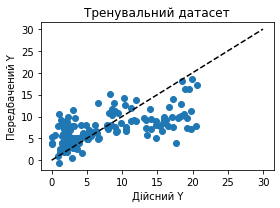

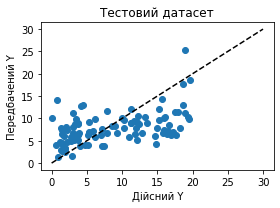

In [9]:
plt.figure(figsize=(4, 3))
plt.title("Тренувальний датасет")
plt.scatter(y_train, y_pred_train)
plt.plot([0, 30], [0, 30], "--k")
plt.axis("tight")
plt.xlabel("Дійсний Y")
plt.ylabel("Передбачений Y")
plt.tight_layout()

plt.figure(figsize=(4, 3))
plt.title("Тeстовий датасет")
plt.scatter(y_test, y_pred_test)
plt.plot([0, 30], [0, 30], "--k")
plt.axis("tight")
plt.xlabel("Дійсний Y")
plt.ylabel("Передбачений Y")
plt.tight_layout()